**1. Завантажте набір даних Autos, як це показано в темі «Вступ до генерації ознак. Відбір ознак» в розділі «Поширені прийоми генерації ознак. Математичні перетворення».**

In [41]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [42]:
with open('mod_05_topic_10_various_data.pkl', 'rb') as file:
    datasets = pickle.load(file)


In [43]:
autos = datasets['autos']
print(df_autos)
df_autos = pd.DataFrame(autos)
df_autos.to_csv(r'file.csv')

            make fuel_type aspiration  num_of_doors   body_style drive_wheels  \
0    alfa-romero       gas        std             2  convertible          rwd   
1    alfa-romero       gas        std             2  convertible          rwd   
2    alfa-romero       gas        std             2    hatchback          rwd   
3           audi       gas        std             4        sedan          fwd   
4           audi       gas        std             4        sedan          4wd   
..           ...       ...        ...           ...          ...          ...   
188        volvo       gas        std             4        sedan          rwd   
189        volvo       gas      turbo             4        sedan          rwd   
190        volvo       gas        std             4        sedan          rwd   
191        volvo    diesel      turbo             4        sedan          rwd   
192        volvo       gas      turbo             4        sedan          rwd   

    engine_location  wheel_

**2. Визначте перелік дискретних ознак (в широкому розумінні) для подальшого розрахунку показника взаємної інформації.**

In [44]:
unique_values = df_autos.nunique()
print(unique_values)

make                  21
fuel_type              2
aspiration             2
num_of_doors           2
body_style             5
drive_wheels           3
engine_location        2
wheel_base            50
length                71
width                 41
height                46
curb_weight          165
engine_type            5
num_of_cylinders       6
engine_size           40
fuel_system            7
bore                  38
stroke                36
compression_ratio      8
horsepower            56
peak_rpm              21
city_mpg              28
highway_mpg           30
price                178
dtype: int64


Після аналізу кількості унікальних значень для кожної ознаки в наборі даних, ми визначили наступний перелік дискретних ознак, які мають обмежену кількість категорій або можливих значень. Ці ознаки можна використовувати для розрахунку показника взаємної інформації або для подальшого кодування категорійних ознак.

#### Опис дискретних ознак:
1. **make** (21 унікальне значення): Виробник автомобіля.
2. **fuel_type** (2 унікальні значення): Тип палива (наприклад, бензин, дизель).
3. **aspiration** (2 унікальні значення): Тип наддуву (стандартний або турбований двигун).
4. **num_of_doors** (2 унікальні значення): Кількість дверей в автомобілі (2 або 4).
5. **body_style** (5 унікальних значень): Тип кузова (наприклад, кабріолет, седан, хетчбек).
6. **drive_wheels** (3 унікальні значення): Тип приводу (передній, задній або повний привід).
7. **engine_location** (2 унікальні значення): Розташування двигуна (переднє або заднє).
8. **engine_type** (5 унікальних значень): Тип двигуна (наприклад, рядний, V-подібний).
9. **num_of_cylinders** (6 унікальних значень): Кількість циліндрів в двигуні.
10. **fuel_system** (7 унікальних значень): Тип паливної системи (наприклад, інжектор, карбюратор).
11. **compression_ratio** (8 унікальних значень): Ступінь стиснення двигуна.

#### Примітки:
- **city_mpg** (28 унікальних значень) та **highway_mpg** (30 унікальних значень) можна трактувати як дискретні ознаки, якщо розглядати їх у контексті категорій (низький, середній, високий показники споживання пального).
- Ознаки, такі як **wheel_base**, **length**, **curb_weight**, **engine_size**, **bore**, **stroke**, **horsepower** та **price**, мають багато унікальних значень і є неперервними. Тому їх не можна вважати дискретними.

In [45]:
discrete_features = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
                     'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 
                     'fuel_system', 'compression_ratio']

**3. Розрахуйте показник взаємної інформації для вхідних ознак і цільової змінної price за допомогою методу mutual_info_regression() з пакета sklearn.**

In [46]:
X_discrete = df[discrete_features]
y = df['price']

X_encoded = X_discrete.apply(LabelEncoder().fit_transform)
mi = mutual_info_regression(X_encoded, y)

mi_results = pd.Series(mi, index=discrete_features).sort_values(ascending=False)
print("Показники взаємної інформації для кожної ознаки:")
print(mi_results)

Показники взаємної інформації для кожної ознаки:
fuel_system          0.469325
num_of_cylinders     0.335938
drive_wheels         0.332922
make                 0.234215
engine_type          0.156686
compression_ratio    0.133480
aspiration           0.087755
body_style           0.069082
fuel_type            0.047298
num_of_doors         0.012234
engine_location      0.000000
dtype: float64


**4. Побудуйте регресійну модель / ансамбль (наприклад, за допомогою обєкта RandomForestRegressorабоGradientBoostingRegressorз пакетаsklearn`) для ефективної оцінки важливості вхідних ознак, подібно до того, як ми це робили у темі «Дерева рішень. Важливість ознак в моделі» в розділі «Важливість ознак у моделі».**

Важливість ознак у моделі RandomForestRegressor:
num_of_cylinders     0.484057
drive_wheels         0.196963
fuel_system          0.093702
make                 0.088652
body_style           0.039871
compression_ratio    0.029960
engine_type          0.023590
aspiration           0.014591
engine_location      0.013630
num_of_doors         0.012567
fuel_type            0.002417
dtype: float64


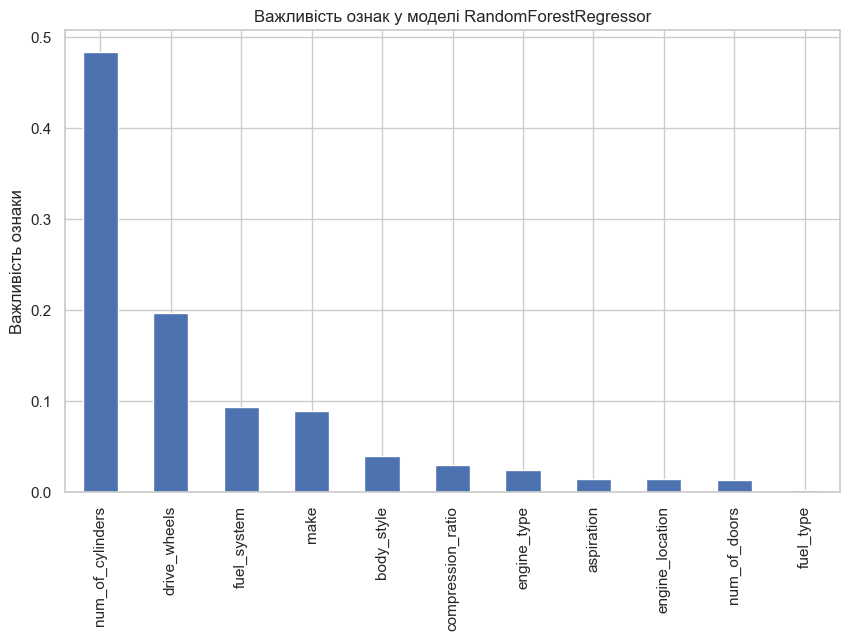

In [47]:


# Вибір дискретних ознак та цільової змінної
X = X_encoded  # закодовані дискретні ознаки з попереднього кроку
y = df_autos['price']

# Розділення даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення і тренування моделі RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Оцінка важливості ознак
importances = model.feature_importances_

# Виведення важливості ознак
rf_importance = pd.Series(importances, index=discrete_features).sort_values(ascending=False)
print("Важливість ознак у моделі RandomForestRegressor:")
print(feature_importance)

# Візуалізація важливості ознак
plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title("Важливість ознак у моделі RandomForestRegressor")
plt.ylabel('Важливість ознаки')
plt.show()


**5. Масштабуйте / уніфікуйте різні за своєю природою показники взаємної інформації та важливості ознак у моделі за допомогою методу .rank(pct=True) об’єкта DataFrame з пакета pandas.**

In [48]:
combined_importance = pd.DataFrame({
    'Mutual Information': mi_results,
    'Feature Importance': rf_importance
})

scaled_importance = combined_importance.rank(pct=True)

print("Масштабовані показники:")
print(scaled_importance)

Масштабовані показники:
                   Mutual Information  Feature Importance
aspiration                   0.454545            0.363636
body_style                   0.363636            0.636364
compression_ratio            0.545455            0.545455
drive_wheels                 0.818182            0.909091
engine_location              0.090909            0.272727
engine_type                  0.636364            0.454545
fuel_system                  1.000000            0.818182
fuel_type                    0.272727            0.090909
make                         0.727273            0.727273
num_of_cylinders             0.909091            1.000000
num_of_doors                 0.181818            0.181818


In [49]:
scaled_importance = combined_importance.rank(pct=True)
scaled_importance_long = scaled_importance.reset_index().melt(id_vars='index', 
                                                              var_name='Metric', 
                                                              value_name='Scaled Value')

**6. Побудуйте візуалізацію типу grouped barsplots для порівняння обох наборів за допомогою методу catplot() з пакета seaborn.**

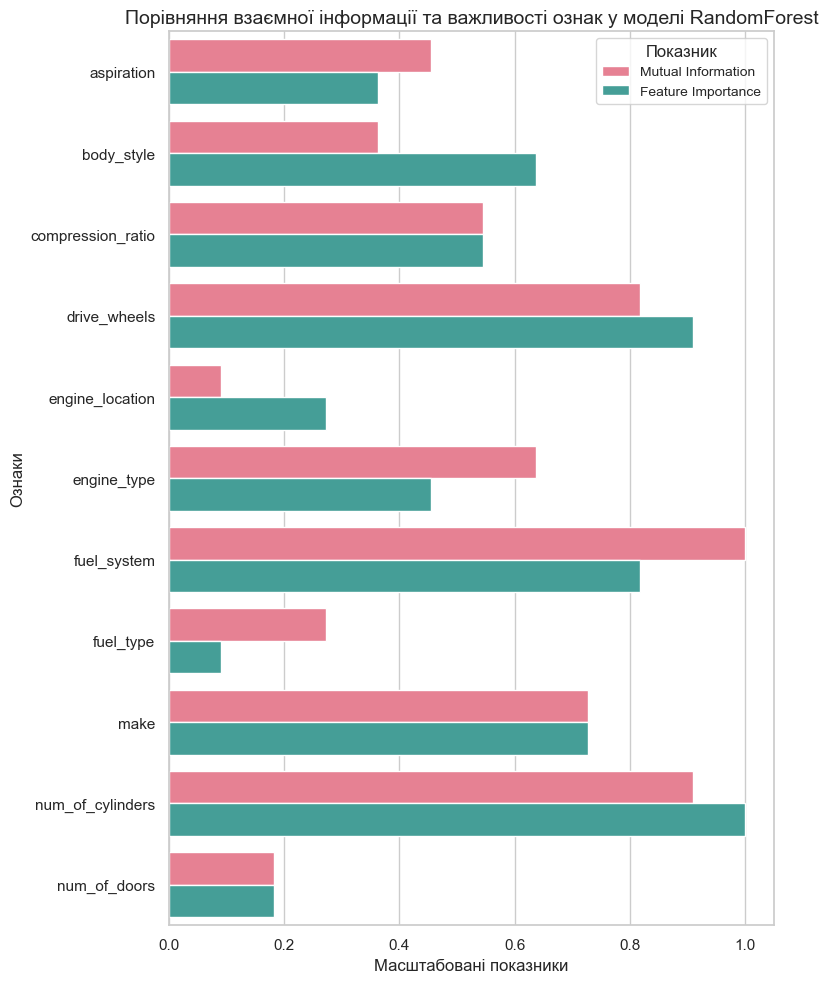

In [50]:

sns.set(style="whitegrid")
plt.figure(figsize=(8,10))

sns.barplot(
    data=scaled_importance_long, 
    x='Scaled Value', 
    y='index', 
    hue='Metric',
    palette="husl"
)

plt.title('Порівняння взаємної інформації та важливості ознак у моделі RandomForest', fontsize=14)
plt.ylabel('Ознаки')
plt.xlabel('Масштабовані показники')
plt.legend(title="Показник", loc="best", fontsize=10)

plt.tight_layout()
plt.show()